# Laboratorio 9

## 1. Pruebas para comparar dos distribuciones.

[Documento](https://docs.google.com/document/d/16ahFqgI-Bv8IkOyJgVHD4JsmVDoYz_RBj_wZt9oK_qU/edit?usp=sharing)

## 2. Comparar muestras de una Geométrica

Chi-Square Test:
Chi2 Statistic: nan, p-value: nan
Kolmogorov-Smirnov Test:
KS Statistic: 0.029, p-value: 0.7946637387576738
Fail to reject the null hypothesis for Chi-Square test: The samples may be from the same distribution.
Fail to reject the null hypothesis for Kolmogorov-Smirnov test: The samples may be from the same distribution.


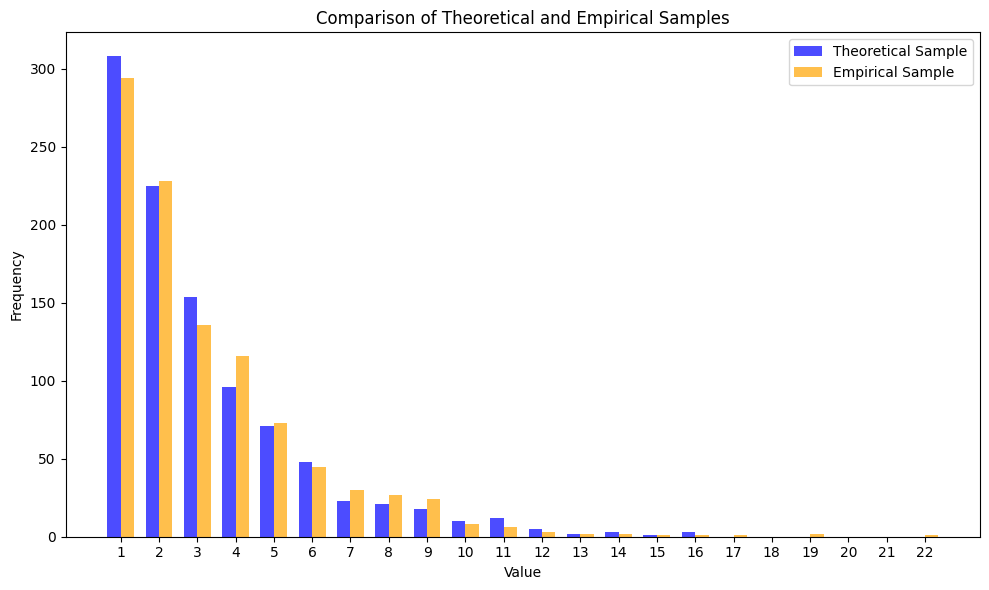

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
p = 0.3  # Probability of success
N = 1000  # Sample size

# Step 1: Generate a theoretical sample from Geom(p)
theoretical_sample = stats.geom.rvs(p, size=N)

# Step 2: Generate an empirical sample using the inverse transform method
u = np.random.uniform(0, 1, N)  # Generate uniform random numbers
empirical_sample = np.ceil(np.log(1 - u) / np.log(1 - p)).astype(int)  # Inverse transform sampling

# Step 3: Create frequency tables with the same bins
max_value = max(np.max(theoretical_sample), np.max(empirical_sample))
bins = np.arange(1, max_value + 2)  # Create bins from 1 to max_value + 1

theoretical_counts, _ = np.histogram(theoretical_sample, bins=bins)
empirical_counts, _ = np.histogram(empirical_sample, bins=bins)

# Chi-Square test
chi2_stat, p_value_chi2 = stats.chisquare(empirical_counts, f_exp=theoretical_counts)

# Step 4: Perform Kolmogorov-Smirnov test
ks_stat, p_value_ks = stats.ks_2samp(theoretical_sample, empirical_sample)

# Print results
print("Chi-Square Test:")
print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_value_chi2}")
print("Kolmogorov-Smirnov Test:")
print(f"KS Statistic: {ks_stat}, p-value: {p_value_ks}")

# Conclusions
alpha = 0.05
if p_value_chi2 < alpha:
    print("Reject the null hypothesis for Chi-Square test: The samples are not from the same distribution.")
else:
    print("Fail to reject the null hypothesis for Chi-Square test: The samples may be from the same distribution.")

if p_value_ks < alpha:
    print("Reject the null hypothesis for Kolmogorov-Smirnov test: The samples are not from the same distribution.")
else:
    print("Fail to reject the null hypothesis for Kolmogorov-Smirnov test: The samples may be from the same distribution.")

# Step 5: Plotting the bar graph
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# X locations for the groups
x = np.arange(len(theoretical_counts))

# Create bar plots
plt.bar(x - bar_width/2, theoretical_counts, width=bar_width, label='Theoretical Sample', alpha=0.7, color='blue')
plt.bar(x + bar_width/2, empirical_counts, width=bar_width, label='Empirical Sample', alpha=0.7, color='orange')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Theoretical and Empirical Samples')
plt.xticks(x, range(1, max_value + 1))
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Tanto la prueba chi2 como la prueba kolmogorov-smirnov, permiten concluir que ambas muestras pertenecen a la misma distribución. Esto ya que en ambos casos no se logró rechaza la hipótesis nula. Al graficar ambas muestras, se puede visualizar que la distribución empírica se asemeja a la distribución teórica.

## 3. Comparar muestras de una Normal

Prueba de Chi-cuadrado:
  Estadístico Chi-cuadrado: 90.6393
  p-valor: 0.0000
  Conclusión: Distribuciones diferentes

Prueba de Kolmogorov-Smirnov:
  Estadístico KS: 0.0320
  p-valor: 0.6855
  Conclusión: Misma distribución



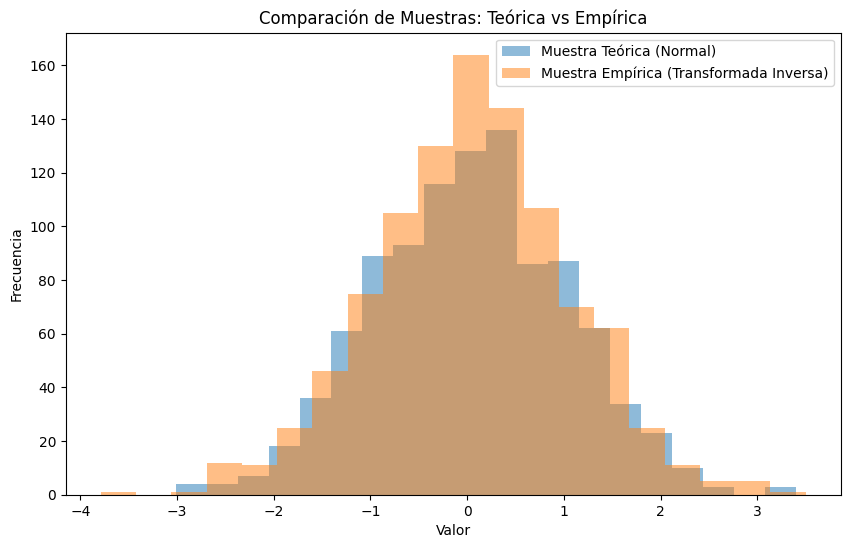

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency, ks_2samp

# Parámetros de la distribución normal
mu = 0      # Media de la distribución normal
sigma = 1   # Desviación estándar de la distribución normal
N = 1000    # Tamaño de la muestra

# Paso 1: Generar la muestra teórica
# Usamos la función `norm.rvs` de scipy.stats para generar una muestra aleatoria de tamaño N
muestra_teorica = norm.rvs(loc=mu, scale=sigma, size=N)

# Paso 2: Generar la muestra empírica utilizando la función de distribución acumulada y el teorema de la transformada inversa
# Generamos una muestra de valores uniformes en el intervalo [0, 1]
uniform_randoms = np.random.uniform(0, 1, N)

# Aplicamos la función de distribución acumulada inversa (transformada inversa) usando la función `norm.ppf`
muestra_empirica = norm.ppf(uniform_randoms, loc=mu, scale=sigma)

# Paso 3: Comparación de las distribuciones con las pruebas de Chi Cuadrado y Kolmogorov-Smirnov
# Prueba de Chi Cuadrado
observed, _ = np.histogram(muestra_empirica, bins=20)
expected, _ = np.histogram(muestra_teorica, bins=20)
chi2_stat, p_val_chi2, _, _ = chi2_contingency([observed, expected])

# Prueba de Kolmogorov-Smirnov
ks_stat, p_val_ks = ks_2samp(muestra_empirica, muestra_teorica)

# Resultados
resultado = {
    "Prueba de Chi-cuadrado": {
        "Estadístico Chi-cuadrado": chi2_stat,
        "p-valor": p_val_chi2,
        "Conclusión": "Misma distribución" if p_val_chi2 > 0.05 else "Distribuciones diferentes"
    },
    "Prueba de Kolmogorov-Smirnov": {
        "Estadístico KS": ks_stat,
        "p-valor": p_val_ks,
        "Conclusión": "Misma distribución" if p_val_ks > 0.05 else "Distribuciones diferentes"
    }
}

# Mostrar resultados
for prueba, valores in resultado.items():
    print(f"{prueba}:")
    for clave, valor in valores.items():
        if isinstance(valor, float):
            print(f"  {clave}: {valor:.4f}")
        else:
            print(f"  {clave}: {valor}")
    print()

# Paso 4: Gráfico de comparación de distribuciones
plt.figure(figsize=(10, 6))
plt.hist(muestra_teorica, bins=20, alpha=0.5, label='Muestra Teórica (Normal)')
plt.hist(muestra_empirica, bins=20, alpha=0.5, label='Muestra Empírica (Transformada Inversa)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación de Muestras: Teórica vs Empírica')
plt.legend()
plt.show()


Mientras que la prueba de Chi-cuadrado indica que las distribuciones son diferentes, la prueba de Kolmogorov-Smirnov no encuentra diferencias significativas entre ellas. Esta discrepancia podría deberse a que cada prueba tiene sus propios supuestos y sensibilidad a diferentes características de las muestras. La prueba de Chi-cuadrado es sensible a la forma en que se agrupan los datos en intervalos, mientras que la prueba de Kolmogorov-Smirnov es una prueba no paramétrica que compara las funciones de distribución acumulativa de ambas muestras.

## 4. Generador Pseudoaleatorio Uniforme

### Definición del generador lineal congruencial

In [ ]:
from typing import Iterator

def generador_lineal_congruencial(modulo: int, multiplicador: int, incremento: int, semilla: int) -> Iterator[int]:
    """
    Implementa el Generador Lineal Congruencial.
    :param modulo: el módulo, una constante positiva
    :param multiplicador: el multiplicador, una constante no negativa < modulo
    :param incremento: el incremento, una constante no negativa < modulo
    :param semilla: el estado inicial del GLC
    :return: un entero no negativo en el rango [0, modulo - 1] representando el estado actual del generador
    """
    x = semilla
    while True:
        yield x
        x = (multiplicador * x + incremento) % modulo


### Funciones para generar muetras de números

In [ ]:
def muestra_aleatoria_uniforme(n_muestras: int, semilla: int = 123_456_789) -> list[float]:
    """
    Genera una secuencia de números pseudoaleatorios de una distribución uniforme en [0, 1).
    :param n_muestras: el número de números pseudoaleatorios a generar
    :param semilla: el estado inicial del GLC
    :return: una lista de longitud n_muestras con los números generados
    """
    MODULO = 2_147_483_648
    MULTIPLICADOR = 594_156_893
    INCREMENTO = 0

    generador = generador_lineal_congruencial(MODULO, MULTIPLICADOR, INCREMENTO, semilla)
    secuencia = []

    for _ in range(n_muestras):
        numero_aleatorio = next(generador) / MODULO
        secuencia.append(numero_aleatorio)

    return secuencia


### Generación de la secuencia y visualización de los resultados

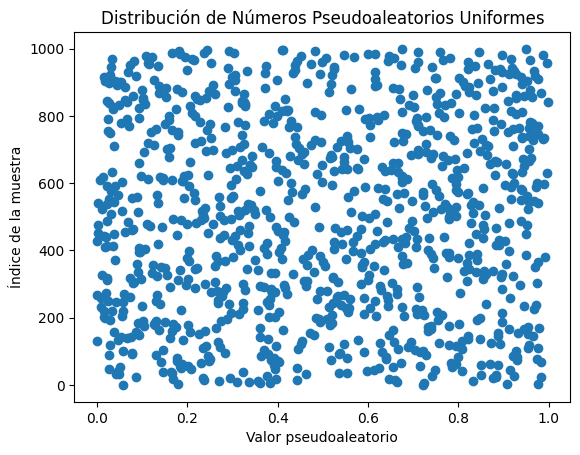

In [ ]:
from matplotlib import pyplot as plt

# Generamos una secuencia de números aleatorios
N = 1000  # Número de muestras a generar
secuencia_aleatoria = muestra_aleatoria_uniforme(N)

# Visualización de los resultados
plt.scatter(secuencia_aleatoria, range(N))
plt.title("Distribución de Números Pseudoaleatorios Uniformes")
plt.xlabel("Valor pseudoaleatorio")
plt.ylabel("Índice de la muestra")
plt.show()


### Pruebas de hipótesis para comparar con una distribución uniforme

In [ ]:
from scipy.stats import kstest

# Prueba de Kolmogorov-Smirnov
estadistico, p_valor = kstest(secuencia_aleatoria, 'uniform')
print(f"Estadístico de Kolmogorov-Smirnov: {estadistico}")
print(f"Valor p: {p_valor}")

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: la secuencia parece seguir una distribución uniforme.")
else:
    print("Se rechaza la hipótesis nula: la secuencia no sigue una distribución uniforme.")


Estadístico de Kolmogorov-Smirnov: 0.02189383668825029
Valor p: 0.7153418535248242
No se rechaza la hipótesis nula: la secuencia parece seguir una distribución uniforme.


## 5. (Otro Generador Pseudoaleatorio)

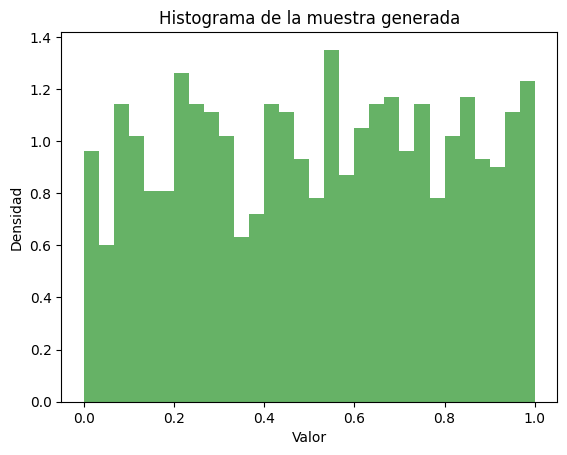

In [ ]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
random.seed(42)

# Generar muestra de tamaño N
N = 1000  # tamaño de la muestra
sample = [random.uniform(0, 1) for _ in range(N)]

# histograma de la muestra
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de la muestra generada')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

In [ ]:
# Prueba de Kolmogorov-Smirnov
ks_stat, p_value = stats.kstest(sample, 'uniform')

print(f'Estadístico KS: {ks_stat}')
print(f'Valor p: {p_value}')

Estadístico KS: 0.0288639653837498
Valor p: 0.3683725055008005


- El histograma muestra que la distribución de la muestra generada es consistente con una distribución uniforme en el intervalo [0,1].
- La prueba de Kolmogorov-Smirnov nos dio un estadístico KS de aproximadamente 0.0289 y un valor p de 0.368. Dado que el valor p es mayor a 0.05, no se puede rechazar la hipótesis nula, lo que indica que la muestra es consistente con una distribución uniforme teórica.

In [ ]:
# Experimentos con diferentes parámetros
for seed in [10, 100, 500]:
    random.seed(seed)
    sample = [random.uniform(0, 1) for _ in range(N)]
    ks_stat, p_value = stats.kstest(sample, 'uniform')
    print(f'Semilla: {seed} - Estadístico KS: {ks_stat}, Valor p: {p_value}')


Semilla: 10 - Estadístico KS: 0.027497704520105637, Valor p: 0.4284805822305251
Semilla: 100 - Estadístico KS: 0.02431387561307785, Valor p: 0.5868379257351808
Semilla: 500 - Estadístico KS: 0.021588933434158436, Valor p: 0.7312944440033997


Las tres pruebas realizadas con semillas distintas (10, 100 y 500) mostraron estadísticos KS bajos (0.021 a 0.027) y valores p elevados (0.42 a 0.73), superiores a 0.05. Esto indica que en todas las pruebas no se rechaza la hipótesis nula, confirmando que las muestras generadas por el Mersenne Twister son consistentes con una distribución uniforme.

In [ ]:
# Implementación de un Generador Lineal Congruencial
def glc(seed, a, c, m, size):
    numbers = []
    x = seed
    for _ in range(size):
        x = (a * x + c) % m
        numbers.append(x / m)
    return numbers

# Parámetros del GLC
seed = 42
a = 1664525
c = 1013904223
m = 2**32
glc_sample = glc(seed, a, c, m, N)

# Prueba de KS para GLC
ks_stat_glc, p_value_glc = stats.kstest(glc_sample, 'uniform')
print(f'Estadístico KS GLC: {ks_stat_glc}, Valor p: {p_value_glc}')


Estadístico KS GLC: 0.027695887019857757, Valor p: 0.41942567899007543


¿Es mejor este generador que el GLC?

Si, Mersenne Twister es mejor que el GLC. Pese a que ambos generadores pasaron las pruebas de hipótesis y mostraron resultados consistentes con una distribución uniforme, el Mersenne Twister es superior debido a su mayor estabilidad, mejor uniformidad en la distribución y un período mucho más largo, lo que lo hace más adecuado para aplicaciones que requieren aleatoriedad de alta calidad y secuencias largas sin repetición. El GLC puede ser útil, pero es más propenso a patrones y tiene un período más corto, lo que limita su efectividad en comparación con el Mersenne Twister.

## Referencias

L’ecuyer, Pierre. "Tables of linear congruential generators of different sizes and good lattice structure." Mathematics of Computation 68.225 (1999): 249-260.
